使用sigmoid激活函式來訓練(0~1)範圍內進行"1的補數"的神經網路

# Include

In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

# Model

In [8]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='sigmoid')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[-0.80425423]], dtype=float32), array([0.], dtype=float32)]


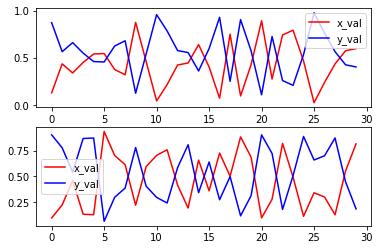

In [9]:
num = 1000
x_train = np.random.rand(num)
y_train = 1 - x_train
x_val = np.random.rand(num)
y_val = 1 - x_val
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [10]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [11]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

2022-03-25 20:57:58.587041: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 20:57:58.608267: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


Epoch 1/10000
16/16 [==============================] - 0s 7ms/step - loss: 0.0631 - val_loss: 0.0659
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0623 - val_loss: 0.0650
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0614 - val_loss: 0.0641
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0606 - val_loss: 0.0632
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0598 - val_loss: 0.0623
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0590 - val_loss: 0.0615
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0582 - val_loss: 0.0607
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0574 - val_loss: 0.0598
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0566 - val_loss: 0.0590
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.0559 - val_lo

[array([[-4.9036593]], dtype=float32), array([2.4481485], dtype=float32)]


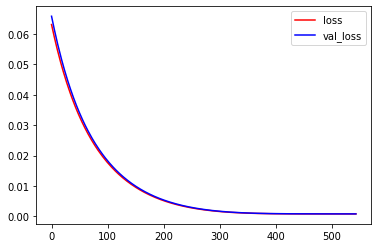

In [12]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

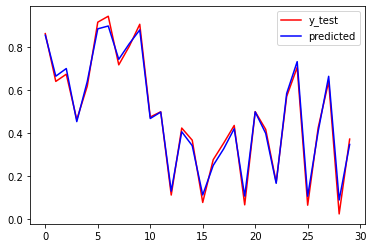

 0.138,  0.855, ads_diff =  0.007
 0.361,  0.664, ads_diff = -0.024
 0.327,  0.699, ads_diff = -0.026
 0.538,  0.452, ads_diff =  0.009
 0.383,  0.639, ads_diff = -0.022
 0.085,  0.884, ads_diff =  0.031
 0.057,  0.897, ads_diff =  0.045
 0.283,  0.742, ads_diff = -0.026
 0.197,  0.815, ads_diff = -0.012
 0.095,  0.879, ads_diff =  0.026
 0.526,  0.467, ads_diff =  0.007
 0.502,  0.497, ads_diff =  0.001
 0.889,  0.129, ads_diff = -0.018
 0.578,  0.405, ads_diff =  0.017
 0.634,  0.340, ads_diff =  0.025
 0.924,  0.111, ads_diff = -0.035
 0.725,  0.248, ads_diff =  0.027
 0.648,  0.326, ads_diff =  0.027
 0.566,  0.419, ads_diff =  0.015
 0.935,  0.106, ads_diff = -0.041
 0.501,  0.497, ads_diff =  0.001
 0.584,  0.398, ads_diff =  0.018
 0.830,  0.165, ads_diff =  0.005
 0.430,  0.584, ads_diff = -0.014
 0.295,  0.731, ads_diff = -0.026
 0.937,  0.105, ads_diff = -0.042
 0.576,  0.407, ads_diff =  0.017
 0.361,  0.663, ads_diff = -0.024
 0.977,  0.087, ads_diff = -0.065
 0.629,  0.346

In [17]:
num = 1000
x_test = np.random.rand(num)
y_test = 1 - x_test
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {1 - (predicted[i, 0] + x_test[i]):6.3f}')